In [1]:
# Ref
# https://github.com/WillKoehrsen/Data-Analysis/blob/master/bayesian_lr/Bayesian%20Linear%20Regression%20Demonstration.ipynb
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression

# Scipy for statistics
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm


In [6]:
exercise = pd.read_csv('data/exercise.txt')
calories = pd.read_csv('data/calories.txt')

df = pd.merge(exercise, calories, on = 'User_ID')
df = df[df['Calories'] < 300]
df = df.reset_index()
df['Intercept'] = 1
df.head()


,index,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intercept
0,0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1


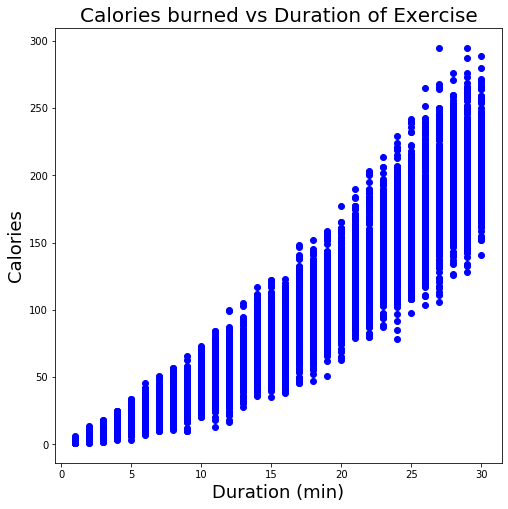

In [7]:
plt.figure(figsize=(8, 8))

plt.plot(df['Duration'], df['Calories'], 'bo');
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [8]:
# Create the features and response
X = df.loc[:, ['Intercept', 'Duration']]
y = df.ix[:, 'Calories']


/Users/longlong/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# Takes a matrix of features (with intercept as first column) 
# and response vector and calculates linear regression coefficients
def linear_regression(X, y):
    # Equation for linear regression coefficients
    beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
    return beta


In [11]:
# # Run the by hand implementation
# by_hand_coefs = linear_regression(X, y)
# print('Intercept calculated by hand:', by_hand_coefs[0])
# print('Slope calculated by hand: ', by_hand_coefs[1])


In [14]:
#  Create the model and fit on the data
# lr = LinearRegression()
# lr.fit(X.Duration.reshape(-1, 1), y)
# print('Intercept from library:', lr.intercept_)
# print('Slope from library:', lr.coef_[0])


# PyMC3 for Bayesian inference
* rather than a single point estimated of model weighrs, Bayesian linear regression will give us a posterior distribution for the model weights

In [18]:
# 慢, 跟linear regression比起來, 真, 慢
with pm.Model() as linear_model_500:
    # pick our prior distribution of our parameters
    # Intercept
    intercept = pm.Normal('Intercept', mu=0, sd=10)
    
    # Slope
    slope = pm.Normal('slope', mu = 0, sd = 10)
    
    # Stand devairation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Edstimate of mean
    mean = intercept + slope * X.loc[0:499, 'Duration']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values[0:500])
    
    # Sampler 
    step = pm.NUTS()
    
    # Posterior distribution
    linear_model_500 = pm.sample(1000, step)
    

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:03<00:00, 787.20draws/s]
The acceptance probability does not match the target. It is 0.9033841275292561, but should be close to 0.8. Try to increase the number of tuning steps.
